In [ ]:
# Import necessary libraries and modules
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import random
import time

import torch
import torchvision
import torchvision.transforms as transforms

from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/ITCS_4152_Group_3_Final_Project"

/content/drive/MyDrive/ITCS_4152_Group_3_Final_Project


In [ ]:
%cd "/content/drive/MyDrive/Computer Vision/ITCS_4152_Group_3_Final_Project"

/content/drive/MyDrive/Computer Vision/ITCS_4152_Group_3_Final_Project


Splits Videos into Frame images

In [ ]:
"""
def video_to_frames(video_path, output_folder):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Get the frames per second (fps) and frame count of the video
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    print(f"Video FPS: {fps}")
    print(f"Number of frames: {frame_count}")

    # Read and save each frame
    for i in range(frame_count):
        ret, frame = cap.read()
        if not ret:
            break

        # Save the frame as an image file
        frame_filename = os.path.join(output_folder, f"frame_{i + 1}.jpg")
        cv2.imwrite(frame_filename, frame)

    # Release the video capture object
    cap.release()

if __name__ == "__main__":
    video_path = "/content/drive/My Drive/ITCS_4152_Group_3_Final_Project/data/temp/sovi_video/_non-veg_video/non-veg_data.mp4"
    output_folder = "/content/drive/My Drive/ITCS_4152_Group_3_Final_Project/data/temp/sovi_video/_non-veg_video/data"

    video_to_frames(video_path, output_folder)
"""

'\ndef video_to_frames(video_path, output_folder):\n    # Open the video file\n    cap = cv2.VideoCapture(video_path)\n\n    # Create the output folder if it doesn\'t exist\n    os.makedirs(output_folder, exist_ok=True)\n\n    # Get the frames per second (fps) and frame count of the video\n    fps = cap.get(cv2.CAP_PROP_FPS)\n    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))\n\n    print(f"Video FPS: {fps}")\n    print(f"Number of frames: {frame_count}")\n\n    # Read and save each frame\n    for i in range(frame_count):\n        ret, frame = cap.read()\n        if not ret:\n            break\n\n        # Save the frame as an image file\n        frame_filename = os.path.join(output_folder, f"frame_{i + 1}.jpg")\n        cv2.imwrite(frame_filename, frame)\n\n    # Release the video capture object\n    cap.release()\n\nif __name__ == "__main__":\n    video_path = "/content/drive/My Drive/ITCS_4152_Group_3_Final_Project/data/temp/sovi_video/_non-veg_video/non-veg_data.mp4"\n    out

**Output**

Video FPS: 29.97

Number of frames: 2320

In [ ]:
"""
def video_to_frames(video_path, output_folder):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Get the frames per second (fps) and frame count of the video
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    print(f"Video FPS: {fps}")
    print(f"Number of frames: {frame_count}")

    # Read and save each frame
    for i in range(frame_count):
        ret, frame = cap.read()
        if not ret:
            break

        # Save the frame as an image file
        frame_filename = os.path.join(output_folder, f"frame_{i + 1}.jpg")
        cv2.imwrite(frame_filename, frame)

    # Release the video capture object
    cap.release()

if __name__ == "__main__":
    video_path = "/content/drive/My Drive/ITCS_4152_Group_3_Final_Project/data/temp/sovi_video/_veg_video/veg_data.mp4"
    output_folder = "/content/drive/My Drive/ITCS_4152_Group_3_Final_Project/data/temp/sovi_video/_veg_video/data"

    video_to_frames(video_path, output_folder)
"""


'\ndef video_to_frames(video_path, output_folder):\n    # Open the video file\n    cap = cv2.VideoCapture(video_path)\n\n    # Create the output folder if it doesn\'t exist\n    os.makedirs(output_folder, exist_ok=True)\n\n    # Get the frames per second (fps) and frame count of the video\n    fps = cap.get(cv2.CAP_PROP_FPS)\n    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))\n\n    print(f"Video FPS: {fps}")\n    print(f"Number of frames: {frame_count}")\n\n    # Read and save each frame\n    for i in range(frame_count):\n        ret, frame = cap.read()\n        if not ret:\n            break\n\n        # Save the frame as an image file\n        frame_filename = os.path.join(output_folder, f"frame_{i + 1}.jpg")\n        cv2.imwrite(frame_filename, frame)\n\n    # Release the video capture object\n    cap.release()\n\nif __name__ == "__main__":\n    video_path = "/content/drive/My Drive/ITCS_4152_Group_3_Final_Project/data/temp/sovi_video/_veg_video/veg_data.mp4"\n    output_fold

**Output**

Video FPS: 29.97

Number of frames: 1003

Data Preprocessing

In [ ]:
#--------------------------------------------------
#    Load Training Data and Testing Data
#--------------------------------------------------

def set_random_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     np.random.seed(seed)
     random.seed(seed)
     torch.backends.cudnn.deterministic = True
set_random_seed(0)

class_names = [name[13:] for name in glob.glob('./data/train/*')]
class_names = dict(zip(range(len(class_names)), class_names))
print("class_names: %s " % class_names)

def load_dataset(path, img_size, num_per_class=-1, batch_size=16, shuffle=False,
           augment=False, is_color=True, zero_centered=False):
    data = []
    labels = []
    channel_num = 3 if is_color else 1

    # read images and resizing
    for id, class_name in class_names.items():
        print("Loading images from class: %s" % id)
        img_path_class = glob.glob(path + class_name + '/*.jpg')
        if num_per_class > 0:
            img_path_class = img_path_class[:num_per_class]
        labels.extend([id]*len(img_path_class))
        for filename in img_path_class:
            if is_color:
                img = cv2.imread(filename)
            else:
                img = cv2.imread(filename, 0)

            # resize the image
            img = cv2.resize(img, img_size, cv2.INTER_LINEAR)

            if is_color:
                img = np.transpose(img, [2, 0, 1])

            # norm pixel values to [-1, 1]
            data.append(img.astype(np.float)/255*2-1)

    ##########--WRITE YOUR CODE HERE--##########
    # Data Augmentation
    if augment:
        #pass

        print(len(data))
        for i in range(len(data)):
          img = data[i]
          newImglr = np.fliplr(img)
          newImgud = np.flipud(img)
          data.append(newImglr)
          data.append(newImgud)
        print(len(data))

    ##########-------END OF CODE-------##########

    ##########--WRITE YOUR CODE HERE--##########
    # Data Normalization

    if zero_centered:
        # Calculate mean and standard deviation for all images
        data_array = np.array(data)
        mean = data_array.mean()
        std = data_array.std()

        # Normalize each image
        for i in range(len(data)):
            img = data[i]
            img = (img - mean) / std
            data[i] = img




    ##########-------END OF CODE-------##########

    # randomly permute (this step is important for training)
    if shuffle:
        bundle = list(zip(data, labels))
        random.shuffle(bundle)
        data, labels = zip(*bundle)

    # divide data into minibatches of TorchTensors
    if batch_size > 1:
        batch_data = []
        batch_labels = []

        for i in range(int(len(data) / batch_size)):
            minibatch_d = data[i*batch_size: (i+1)*batch_size]
            minibatch_d = np.reshape(minibatch_d, (batch_size, channel_num, img_size[0], img_size[1]))
            batch_data.append(torch.from_numpy(minibatch_d))

            minibatch_l = labels[i*batch_size: (i+1)*batch_size]
            batch_labels.append(torch.LongTensor(minibatch_l))
        data, labels = batch_data, batch_labels

    return zip(batch_data, batch_labels)

class_names: {0: 'veg', 1: 'non-veg'} 


Loading Data

In [ ]:
# Load data into size (64, 64)
img_size = (64, 64)
batch_size = 64  # Training sample number per batch

# Load training dataset
trainloader = list(load_dataset('./data/train/', img_size, batch_size=batch_size, shuffle=True))
train_num = len(trainloader)
print("Finish loading %d minibatches (batch_size=%d) of training samples." % (train_num, batch_size))

# Load testing dataset
testloader = list(load_dataset('./data/test/', img_size, num_per_class=50, batch_size=batch_size))
test_num = len(testloader)
print("Finish loading %d minibatches (batch_size=%d) of testing samples." % (test_num, batch_size))

Loading images from class: 0


<ipython-input-67-8d2c599577a5>:43: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.append(img.astype(np.float)/255*2-1)


Loading images from class: 1
Finish loading 68 minibatches (batch_size=64) of training samples.
Loading images from class: 0
Loading images from class: 1
Finish loading 1 minibatches (batch_size=64) of testing samples.


In [ ]:
from sklearn.model_selection import train_test_split

# Load data into size (64, 64)
img_size = (64, 64)
batch_size = 64  # Training sample number per batch

# Load all data from the train folder
all_data = list(load_dataset('./data/train/', img_size, batch_size=batch_size, shuffle=True))
all_num = len(all_data)

# Split the data into training and testing sets (80/20 split)
trainloader, testloader = train_test_split(all_data, test_size=0.2, random_state=42)

train_num = len(trainloader)
print("Finish loading %d minibatches (batch_size=%d) of training samples." % (train_num, batch_size))

test_num = len(testloader)
print("Finish loading %d minibatches (batch_size=%d) of testing samples." % (test_num, batch_size))

Loading images from class: 0


<ipython-input-67-8d2c599577a5>:43: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.append(img.astype(np.float)/255*2-1)


Loading images from class: 1
Finish loading 54 minibatches (batch_size=64) of training samples.
Finish loading 14 minibatches (batch_size=64) of testing samples.


veg


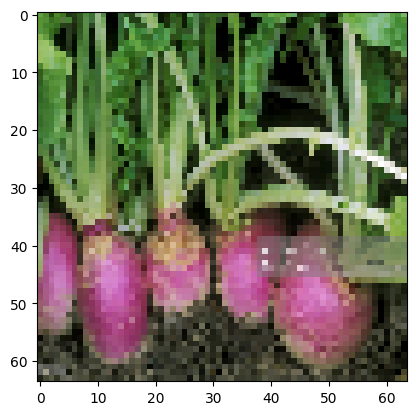

In [ ]:
# show some images
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    npimg = (npimg * 255).astype(np.uint8)


    if npimg.shape[0] == 1:
        npimg = np.stack([npimg[0]] * 3, axis=-1)

    npimg = npimg.transpose((1, 2, 0))  # Transpose to (H, W, C) for display
    npimg = cv2.cvtColor(npimg, cv2.COLOR_BGR2RGB)
    plt.imshow(npimg)
    plt.show()

num_images = len(trainloader)
random_index = np.random.randint(num_images)


img, label = trainloader[0][0][random_index], trainloader[0][1][random_index]
label = int(np.array(label))
print(class_names[label])
imshow(img)

Model Training Function

In [ ]:
# Model training function (modified for RGB)
def trainModel(net, trainloader, train_option, testloader=None):
    loss_func = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy Loss
    lr = train_option['lr']
    epoch = train_option['epoch']
    device = train_option['device'] if 'device' in train_option.keys() else 'cpu'
    log_iter = train_option['log_iter'] if 'log_iter' in train_option.keys() else 20
    eval_epoch = 1

    if 'optimizer' in train_option.keys():
        optimizer = train_option['optimizer']
    else:
        optimizer = optim.Adam(net.parameters(), lr=lr)

    start_time = time.time()
    if device == 'gpu':
        net = net.cuda()

    iters = 0
    running_loss = 0.0
    for ep in range(epoch):
        net.train()
        for iter, (x, y) in enumerate(trainloader):
            iters += 1
            batch_x = Variable(x).float()
            batch_y = Variable(y).float()  # Use float for binary classification
            if device == 'gpu':
                batch_x = batch_x.cuda()
                batch_y = batch_y.cuda()

            outputs = net(batch_x)
            loss = loss_func(outputs, batch_y.view(-1, 1))  # Reshape batch_y for BCEWithLogitsLoss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            time_lapse = time.strftime('%H:%M:%S', time.gmtime(time.time() - start_time))
            if iter % log_iter == 0:
                print('Epoch:{:2d} | Iter:{:5d} | Time: {} | Train Loss: {:.4f} | Average Loss: {:.4f} '.format(ep + 1, iter, time_lapse, loss.item(), running_loss / iters))

        if testloader is not None and ep % eval_epoch == 0:
            evalModel(net, testloader)

Model Evaluation Function

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Model evaluation function with ROC (modified for RGB)
def evalModel(net, testloader):
    acc = 0.0
    count = 0
    start_time = time.time()
    device = 'cuda' if next(net.parameters()).is_cuda else 'cpu'
    net.eval()

    true_labels = []
    predicted_scores = []

    for iter, (x, y) in enumerate(testloader):
        count += x.size(0)
        batch_x = Variable(x).float()
        batch_y = Variable(y).long()

        if device == 'cuda':
            batch_x = batch_x.cuda()
            batch_y = batch_y.cuda()

        outputs = net(batch_x)

        _, predicted = torch.max(outputs, 1)
        acc += torch.sum(predicted == batch_y)

        true_labels.extend(batch_y.cpu().numpy())
        predicted_scores.extend(torch.sigmoid(outputs).cpu().detach().numpy())

    true_labels = np.array(true_labels)
    predicted_scores = np.array(predicted_scores)

    fpr, tpr, _ = roc_curve(true_labels, predicted_scores)
    auc_score = roc_auc_score(true_labels, predicted_scores)

    time_lapse = time.strftime('%H:%M:%S', time.gmtime(time.time() - start_time))
    accuracy = acc.item() / count
    print('Accuracy: {:.4f} | Time: {}'.format(auc_score, time_lapse))

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_score))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()



Network Architecture

In [ ]:
#Create pretrained ResNet50 Model
resnet = torchvision.models.resnet50(pretrained=True)

#Saves parameters of resnet
for param in resnet.parameters():
  param.requires_grad = False

#Unfreezes fully connected layer
for param in resnet.fc.parameters():
    param.requires_grad = True

#Set fully connected llyaer to Binary Classification
num_ftrs = resnet.fc.in_features
resnet.fc = nn.Linear(num_ftrs, 1)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Start Training & Evaluation

Epoch: 1 | Iter:    0 | Time: 00:00:00 | Train Loss: 0.7020 | Average Loss: 0.7020 
Epoch: 1 | Iter:   20 | Time: 00:00:00 | Train Loss: 0.4919 | Average Loss: 0.5908 
Epoch: 1 | Iter:   40 | Time: 00:00:00 | Train Loss: 0.4009 | Average Loss: 0.5276 
Accuracy: 0.9195 | Time: 00:00:00


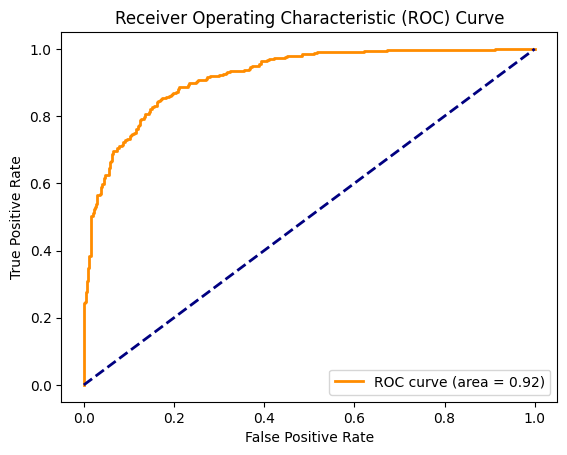

Epoch: 2 | Iter:    0 | Time: 00:00:01 | Train Loss: 0.3442 | Average Loss: 0.4940 
Epoch: 2 | Iter:   20 | Time: 00:00:02 | Train Loss: 0.3199 | Average Loss: 0.4612 
Epoch: 2 | Iter:   40 | Time: 00:00:02 | Train Loss: 0.3291 | Average Loss: 0.4385 
Accuracy: 0.9341 | Time: 00:00:00


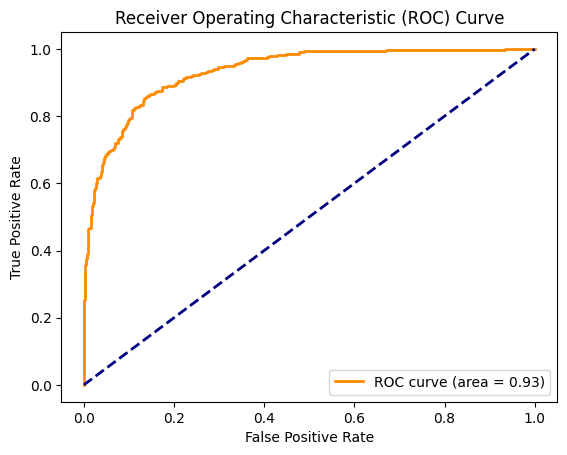

Epoch: 3 | Iter:    0 | Time: 00:00:03 | Train Loss: 0.3102 | Average Loss: 0.4250 
Epoch: 3 | Iter:   20 | Time: 00:00:04 | Train Loss: 0.2873 | Average Loss: 0.4096 
Epoch: 3 | Iter:   40 | Time: 00:00:04 | Train Loss: 0.2980 | Average Loss: 0.3972 
Accuracy: 0.9409 | Time: 00:00:00


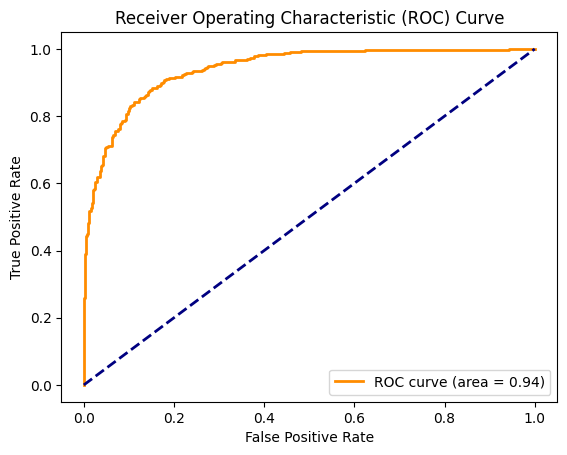

Epoch: 4 | Iter:    0 | Time: 00:00:05 | Train Loss: 0.2905 | Average Loss: 0.3894 
Epoch: 4 | Iter:   20 | Time: 00:00:06 | Train Loss: 0.2705 | Average Loss: 0.3796 
Epoch: 4 | Iter:   40 | Time: 00:00:06 | Train Loss: 0.2776 | Average Loss: 0.3713 
Accuracy: 0.9453 | Time: 00:00:00


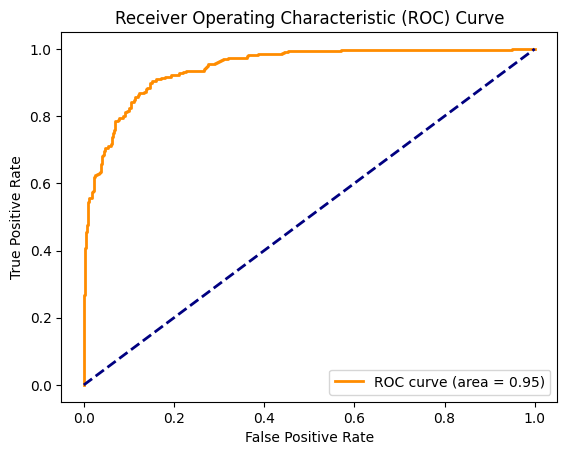

Epoch: 5 | Iter:    0 | Time: 00:00:07 | Train Loss: 0.2757 | Average Loss: 0.3658 
Epoch: 5 | Iter:   20 | Time: 00:00:08 | Train Loss: 0.2591 | Average Loss: 0.3587 
Epoch: 5 | Iter:   40 | Time: 00:00:09 | Train Loss: 0.2619 | Average Loss: 0.3525 
Accuracy: 0.9480 | Time: 00:00:00


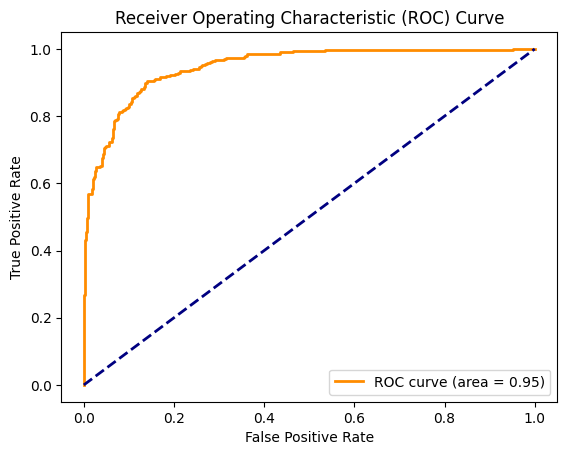

Epoch: 6 | Iter:    0 | Time: 00:00:10 | Train Loss: 0.2638 | Average Loss: 0.3484 
Epoch: 6 | Iter:   20 | Time: 00:00:11 | Train Loss: 0.2501 | Average Loss: 0.3429 
Epoch: 6 | Iter:   40 | Time: 00:00:12 | Train Loss: 0.2487 | Average Loss: 0.3379 
Accuracy: 0.9501 | Time: 00:00:00


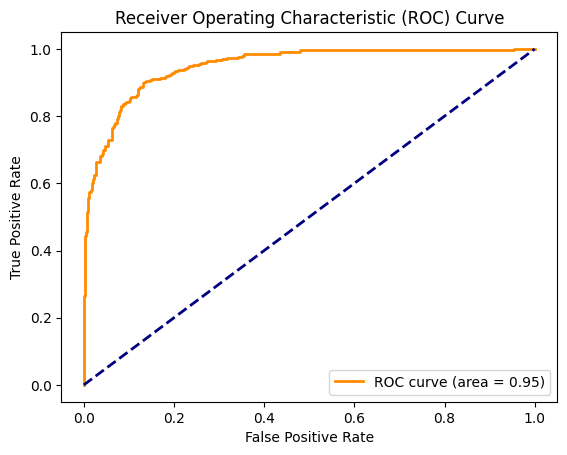

Epoch: 7 | Iter:    0 | Time: 00:00:13 | Train Loss: 0.2541 | Average Loss: 0.3346 
Epoch: 7 | Iter:   20 | Time: 00:00:14 | Train Loss: 0.2422 | Average Loss: 0.3301 
Epoch: 7 | Iter:   40 | Time: 00:00:15 | Train Loss: 0.2371 | Average Loss: 0.3259 
Accuracy: 0.9515 | Time: 00:00:00


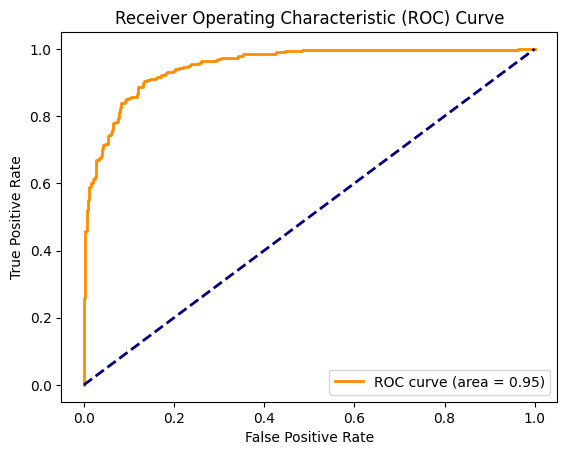

Epoch: 8 | Iter:    0 | Time: 00:00:16 | Train Loss: 0.2459 | Average Loss: 0.3232 
Epoch: 8 | Iter:   20 | Time: 00:00:16 | Train Loss: 0.2350 | Average Loss: 0.3193 
Epoch: 8 | Iter:   40 | Time: 00:00:16 | Train Loss: 0.2267 | Average Loss: 0.3158 
Accuracy: 0.9529 | Time: 00:00:00


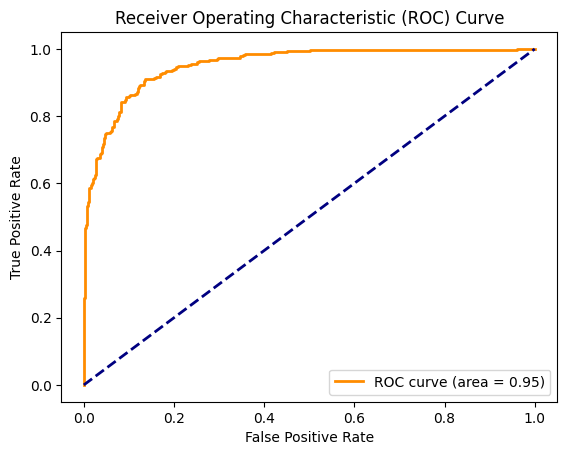

Epoch: 9 | Iter:    0 | Time: 00:00:17 | Train Loss: 0.2388 | Average Loss: 0.3135 
Epoch: 9 | Iter:   20 | Time: 00:00:17 | Train Loss: 0.2283 | Average Loss: 0.3101 
Epoch: 9 | Iter:   40 | Time: 00:00:18 | Train Loss: 0.2174 | Average Loss: 0.3070 
Accuracy: 0.9538 | Time: 00:00:00


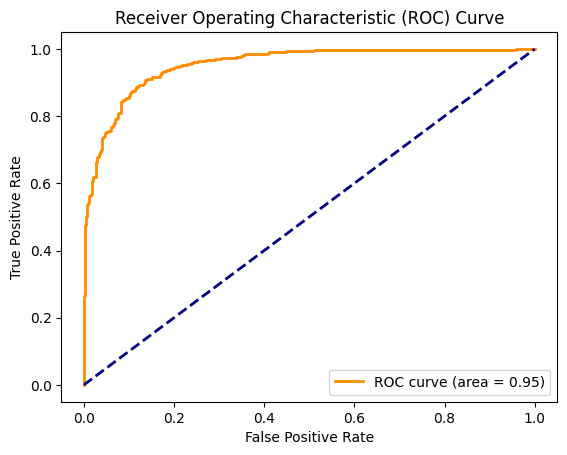

Epoch:10 | Iter:    0 | Time: 00:00:18 | Train Loss: 0.2325 | Average Loss: 0.3050 
Epoch:10 | Iter:   20 | Time: 00:00:19 | Train Loss: 0.2219 | Average Loss: 0.3020 
Epoch:10 | Iter:   40 | Time: 00:00:19 | Train Loss: 0.2088 | Average Loss: 0.2992 
Accuracy: 0.9548 | Time: 00:00:00


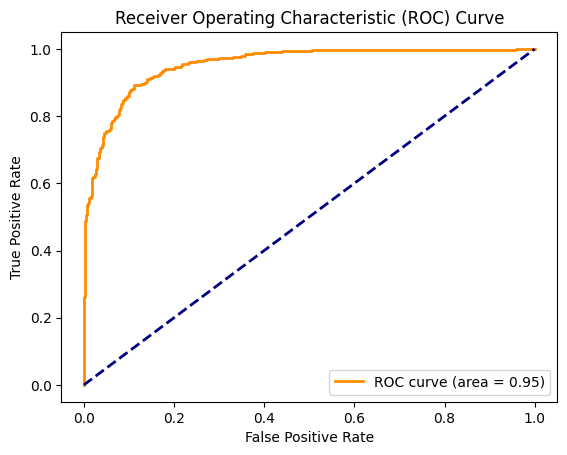

Epoch:11 | Iter:    0 | Time: 00:00:20 | Train Loss: 0.2270 | Average Loss: 0.2974 
Epoch:11 | Iter:   20 | Time: 00:00:20 | Train Loss: 0.2158 | Average Loss: 0.2947 
Epoch:11 | Iter:   40 | Time: 00:00:21 | Train Loss: 0.2010 | Average Loss: 0.2923 
Accuracy: 0.9554 | Time: 00:00:00


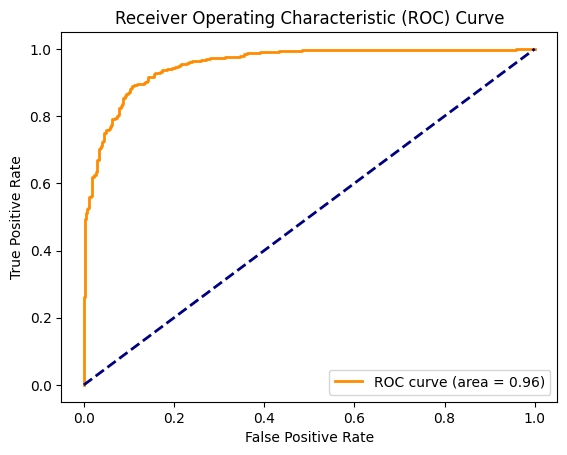

Epoch:12 | Iter:    0 | Time: 00:00:21 | Train Loss: 0.2219 | Average Loss: 0.2906 
Epoch:12 | Iter:   20 | Time: 00:00:22 | Train Loss: 0.2098 | Average Loss: 0.2882 
Epoch:12 | Iter:   40 | Time: 00:00:22 | Train Loss: 0.1939 | Average Loss: 0.2859 
Accuracy: 0.9560 | Time: 00:00:00


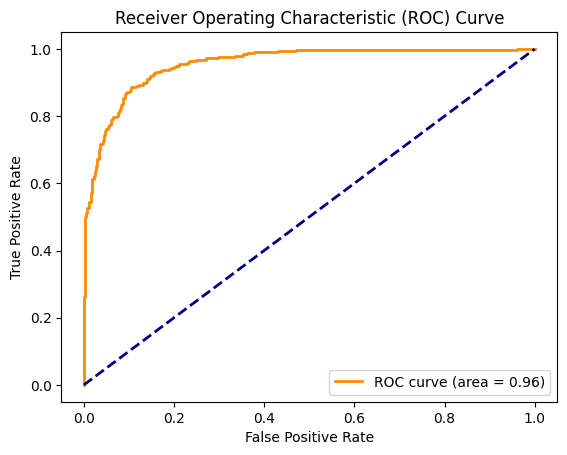

Epoch:13 | Iter:    0 | Time: 00:00:23 | Train Loss: 0.2173 | Average Loss: 0.2844 
Epoch:13 | Iter:   20 | Time: 00:00:23 | Train Loss: 0.2041 | Average Loss: 0.2822 
Epoch:13 | Iter:   40 | Time: 00:00:23 | Train Loss: 0.1874 | Average Loss: 0.2801 
Accuracy: 0.9564 | Time: 00:00:00


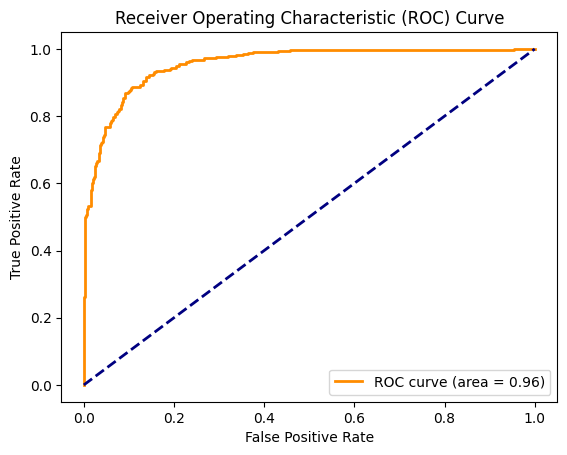

Epoch:14 | Iter:    0 | Time: 00:00:24 | Train Loss: 0.2131 | Average Loss: 0.2787 
Epoch:14 | Iter:   20 | Time: 00:00:24 | Train Loss: 0.1985 | Average Loss: 0.2767 
Epoch:14 | Iter:   40 | Time: 00:00:25 | Train Loss: 0.1814 | Average Loss: 0.2748 
Accuracy: 0.9568 | Time: 00:00:00


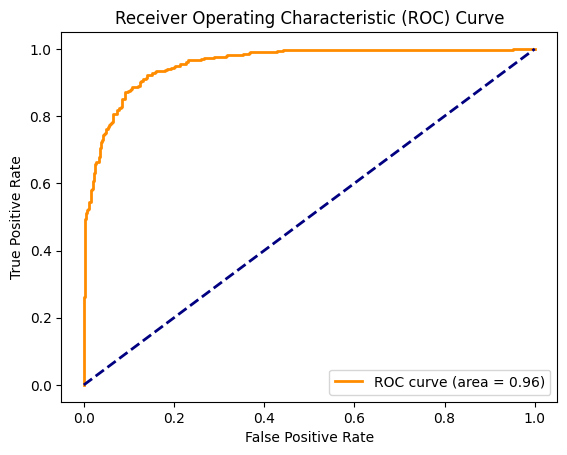

Epoch:15 | Iter:    0 | Time: 00:00:25 | Train Loss: 0.2092 | Average Loss: 0.2735 
Epoch:15 | Iter:   20 | Time: 00:00:26 | Train Loss: 0.1930 | Average Loss: 0.2716 
Epoch:15 | Iter:   40 | Time: 00:00:26 | Train Loss: 0.1760 | Average Loss: 0.2698 
Accuracy: 0.9572 | Time: 00:00:00


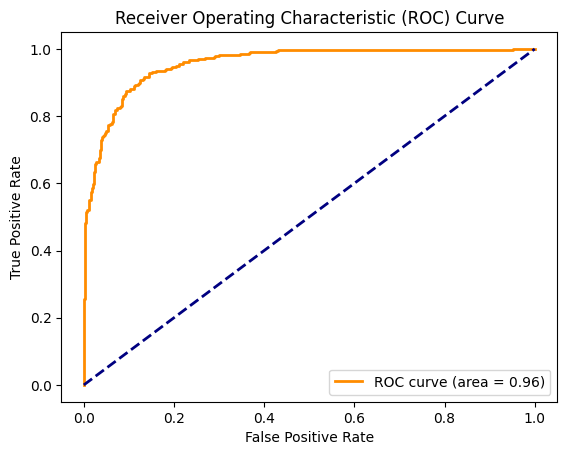

In [ ]:

# Training options
train_option = {}
train_option['lr'] = 0.001
train_option['epoch'] = 15
train_option['device'] = 'gpu'

# Train the model
trainModel(resnet, trainloader, train_option, testloader)


**Demo**

In [ ]:
torch.save(resnet.state_dict(), 'resnet')

In [ ]:
model = resnet
model.load_state_dict(torch.load('resnet'))
model.eval()

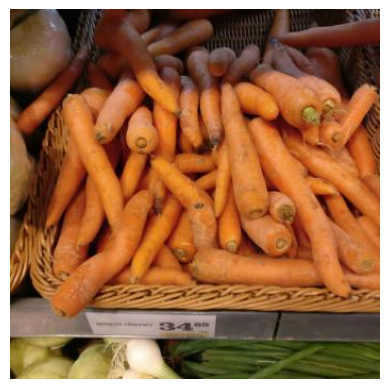

Raw prediction scores: [[-3.3215525]]
Predicted class: Veg


<ipython-input-106-336f5833aa1f>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img = img.astype(np.float)/255*2-1


In [ ]:
from PIL import Image

def preprocess_image(img_path, img_size=(64, 64)):
    img = cv2.imread(img_path)
    img = cv2.resize(img, img_size, cv2.INTER_LINEAR)
    img = np.transpose(img, [2, 0, 1])
    img = img.astype(np.float)/255*2-1
    img = torch.from_numpy(img).float()
    img = img.unsqueeze(0)  # Add batch dimension
    return img

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

img_path = './data/Demo/Carrots_007.jpg'
#img_path = './data/valid/non-veg/frame_255.jpg'

# Define a transformation to apply to the image before displaying
preprocess = transforms.Compose([
    transforms.ToTensor()  # Convert PIL image to PyTorch tensor
])

# Load the image using PIL
img = Image.open(img_path).convert('RGB')  # Ensure it's in RGB format

# Apply the transformation
img_tensor = preprocess(img)

# Display the image using matplotlib
plt.imshow(img_tensor.permute(1, 2, 0))  # Matplotlib expects the color channel to be the last dimension
plt.axis('off')  # Turn off axis labels
plt.show()


input_image = preprocess_image(img_path)
input_image = input_image.to(device)

# Make prediction
with torch.no_grad():
    model.eval()
    output = model(input_image)

pred = output.cpu().numpy()
# Print the raw prediction scores
print("Raw prediction scores:", pred)

# Convert raw scores to class labels based on a threshold
threshold = 0  # Adjust this threshold as needed
predicted_class = 'Veg' if pred < threshold else 'Non-veg'


print("Predicted class:", predicted_class)

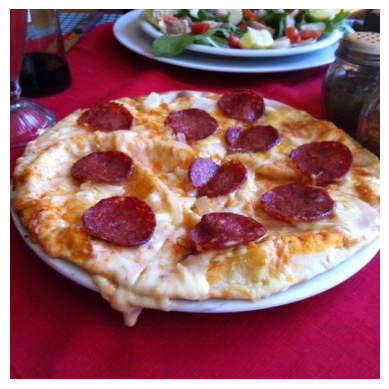

Raw prediction scores: [[4.46353]]
Predicted class: Non-veg


<ipython-input-106-336f5833aa1f>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img = img.astype(np.float)/255*2-1


In [ ]:
img_path = './data/Demo/6.jpg'


# Define a transformation to apply to the image before displaying
preprocess = transforms.Compose([
    transforms.ToTensor()  # Convert PIL image to PyTorch tensor
])

# Load the image using PIL
img = Image.open(img_path).convert('RGB')  # Ensure it's in RGB format

# Apply the transformation
img_tensor = preprocess(img)

# Display the image using matplotlib
plt.imshow(img_tensor.permute(1, 2, 0))  # Matplotlib expects the color channel to be the last dimension
plt.axis('off')  # Turn off axis labels
plt.show()


input_image = preprocess_image(img_path)
input_image = input_image.to(device)

# Make prediction
with torch.no_grad():
    model.eval()
    output = model(input_image)

pred = output.cpu().numpy()
# Print the raw prediction scores
print("Raw prediction scores:", pred)

# Convert raw scores to class labels based on a threshold
threshold = 0  # Adjust this threshold as needed
predicted_class = 'Veg' if pred < threshold else 'Non-veg'


print("Predicted class:", predicted_class)